<a href="https://colab.research.google.com/github/pallavmarch/Regression-Analysis-Projects/blob/main/Car_Price_Regg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import os

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [2]:
dataset = "shaistashaikh/carprice-assignment"
os.system(f"kaggle datasets download -d {dataset} -p ./ --unzip")

file_path = "./CarPrice_Assignment.csv"
df = pd.read_csv(file_path)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# FUNCTIONS

In [15]:
def datacheck(data):

    table_data = []

    for i in data.columns:
      table_data.append([i, len(data[i].unique()), data[i].isna().sum(), data[i].dtypes])
    print(tabulate(table_data, headers=["Column", "Total Unique Values", "Missing Values","Data Type"], tablefmt="fancy_grid"))



def histogramvisual(a,alabel):

  sns.histplot(a,  kde=True, color='blue')

  plt.title(f"{alabel} Distibution")
  plt.xlabel(alabel)
  plt.ylabel("Total cars")
  plt.tick_params(axis='x', labelsize=8, rotation=85)

  plt.tight_layout()
  plt.show()
  return



def visualize_data(a, b, alabel, blabel, chart_type="count"):

    palette = sns.color_palette("husl")


    if chart_type == "count":   #Count Chart
        ax = sns.countplot(x=a, hue=b, palette=palette, alpha=0.5, edgecolor='black', linewidth=0.5)
    elif chart_type == "bar":   #Bar Chart
        ax = sns.barplot(x=a, y=b, palette=palette, alpha=0.5, edgecolor='black', linewidth=0.5)
    else:
        print("Invalid chart type. Choose 'count' or 'bar'.")
        return

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=7)

    plt.title(f"{alabel} vs {blabel} {chart_type} graph")
    plt.xlabel(alabel)
    plt.ylabel(blabel)
    plt.tick_params(axis='x', labelsize=8, rotation=80)

    return plt.show()





def pairplt(a,b,data):

  plt.figure(figsize=(15,10))
  sns.pairplot(data, x_vars=a, y_vars=b, height=3)
  plt.show()
  return



def Correlaton(x):
  plt.subplots(figsize=(10, 8))
  sns.heatmap(x.corr(), annot=True,cmap="coolwarm")
  plt.show()
  return



def mod(model,x_train_std, x_test_std, y_train, y_test):

    color_code = "\033[31m"   # Red
    reset_code = "\033[0m"    # default
    color_yellow = "\033[33m" #Yellow

    print(f"Model: {color_code}{model}{reset_code}")

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)


    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)


    print(f"Mean Squared Error (MSE): {color_yellow}{mse:.2f}{reset_code}")
    print(f"Root Mean Squared Error (RMSE): {color_yellow}{rmse:.2f}{reset_code}")
    print(f"Mean Absolute Error (MAE): {color_yellow}{mae:.2f}{reset_code}")
    print(f"R-squared (R²): {color_yellow}{r_squared:.2f}{reset_code}")

    return

# DATASET

In [4]:
datacheck(df)

╒══════════════════╤═══════════════════════╤══════════════════╤═════════════╕
│ Column           │   Total Unique Values │   Missing Values │ Data Type   │
╞══════════════════╪═══════════════════════╪══════════════════╪═════════════╡
│ car_ID           │                   205 │                0 │ int64       │
├──────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ symboling        │                     6 │                0 │ int64       │
├──────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ CarName          │                   147 │                0 │ object      │
├──────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ fueltype         │                     2 │                0 │ object      │
├──────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ aspiration       │                     2 │                0 │ object      │
├──────────────────┼───────────────────────┼──────────────────┼─

In [5]:
df['CarName'].str.lower().unique()
df['Company']=df['CarName'].apply(lambda x: x.split(' ')[0])

In [6]:
z = df.groupby('Company')['price'].mean().reset_index().sort_values(by='Company', ascending=False)
y= df.groupby('fueltype')['price'].mean().reset_index().sort_values(by='fueltype', ascending=False)

# *GRAPHS*

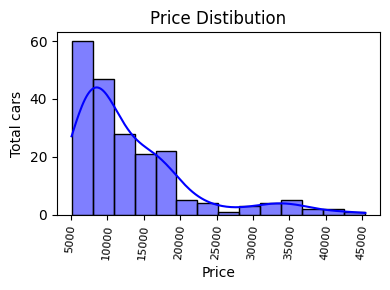

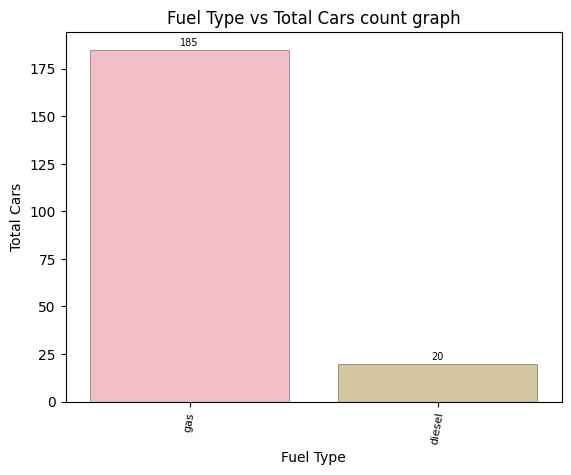

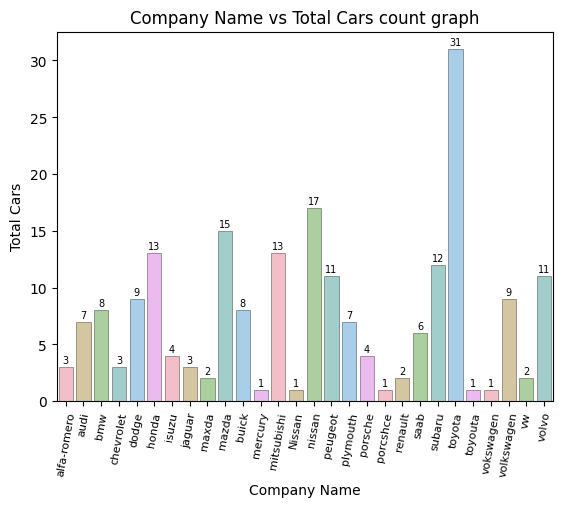

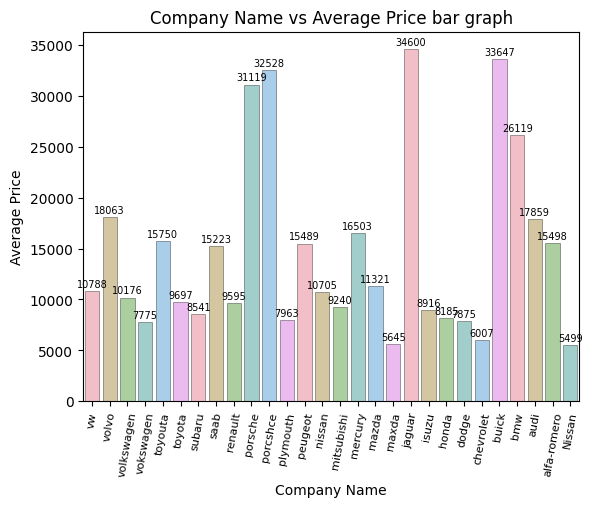

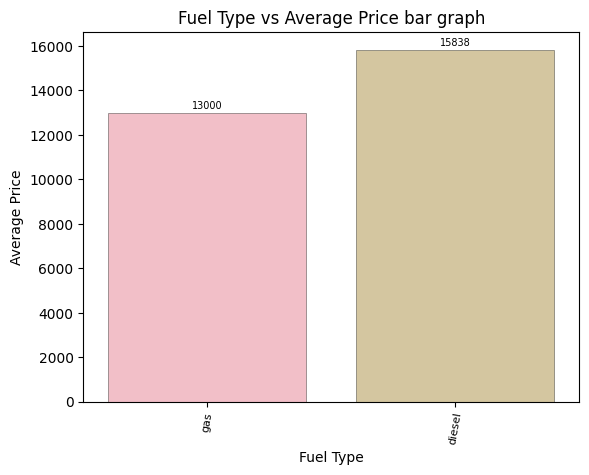

In [7]:
plt.figure(figsize=(4,3))

histogramvisual(df['price'],"Price")


visualize_data(df['fueltype'],df['fueltype'],"Fuel Type","Total Cars", "count")


visualize_data(df['Company'],df['Company'],"Company Name","Total Cars", "count")


visualize_data(z['Company'],z['price'],"Company Name","Average Price", "bar")


visualize_data(y['fueltype'],y['price'],"Fuel Type","Average Price", "bar")

Also taking into consideration the Car length, width, height and weight and how it correlated to the prices. After that we're looking into the other parameteres

<Figure size 1500x1000 with 0 Axes>

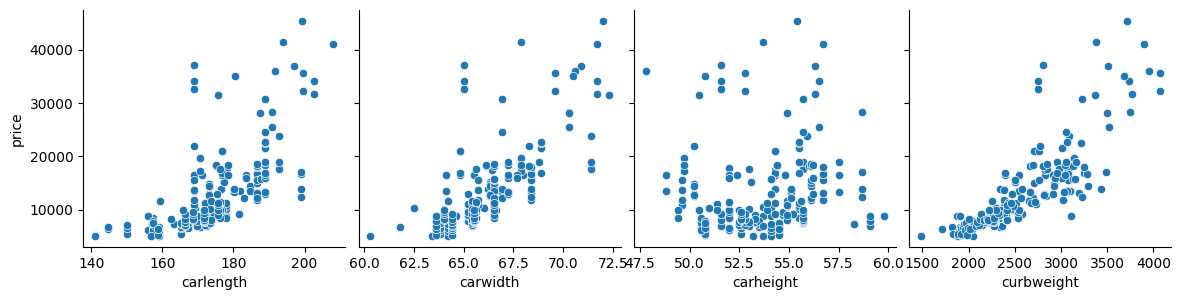

<Figure size 1500x1000 with 0 Axes>

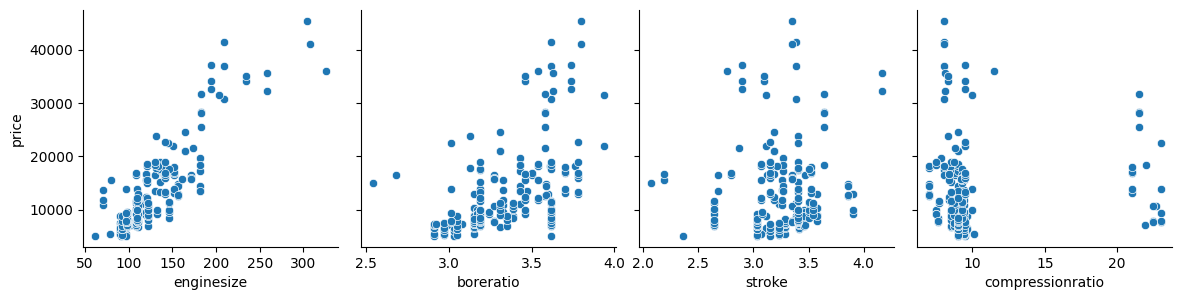

<Figure size 1500x1000 with 0 Axes>

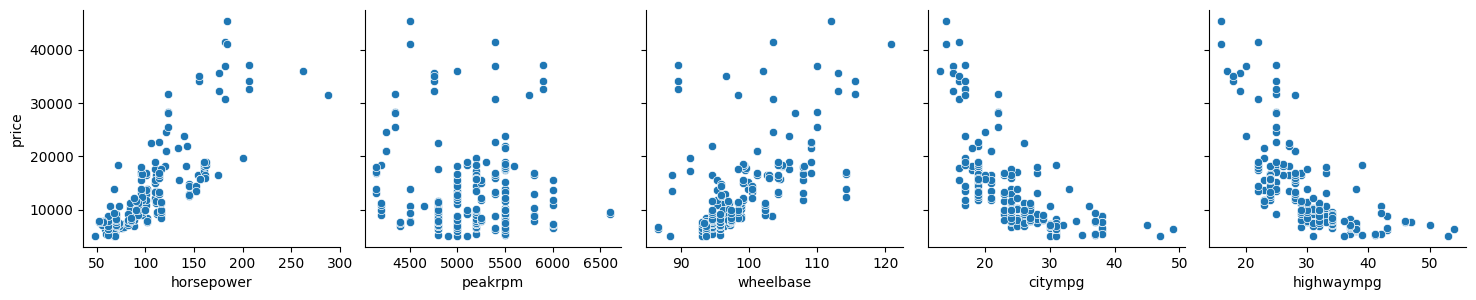

In [8]:
pairplt(['carlength','carwidth','carheight','curbweight'],'price',df)
pairplt(['enginesize','boreratio','stroke','compressionratio'],'price',df)
pairplt(['horsepower', 'peakrpm','wheelbase', 'citympg', 'highwaympg'],'price',df)

# PreProcessing

In [9]:
new_df = df[['fueltype','carlength', 'carwidth', 'carheight', 'curbweight','enginesize','stroke',
             'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']]
new_df = pd.get_dummies(new_df, columns=['fueltype']).astype(int)

new_df.head()

,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas
0,168,64,48,2548,130,2,9,111,5000,21,27,13495,0,1
1,168,64,48,2548,130,2,9,111,5000,21,27,16500,0,1
2,171,65,52,2823,152,3,9,154,5000,19,26,16500,0,1
3,176,66,54,2337,109,3,10,102,5500,24,30,13950,0,1
4,176,66,54,2824,136,3,8,115,5500,18,22,17450,0,1


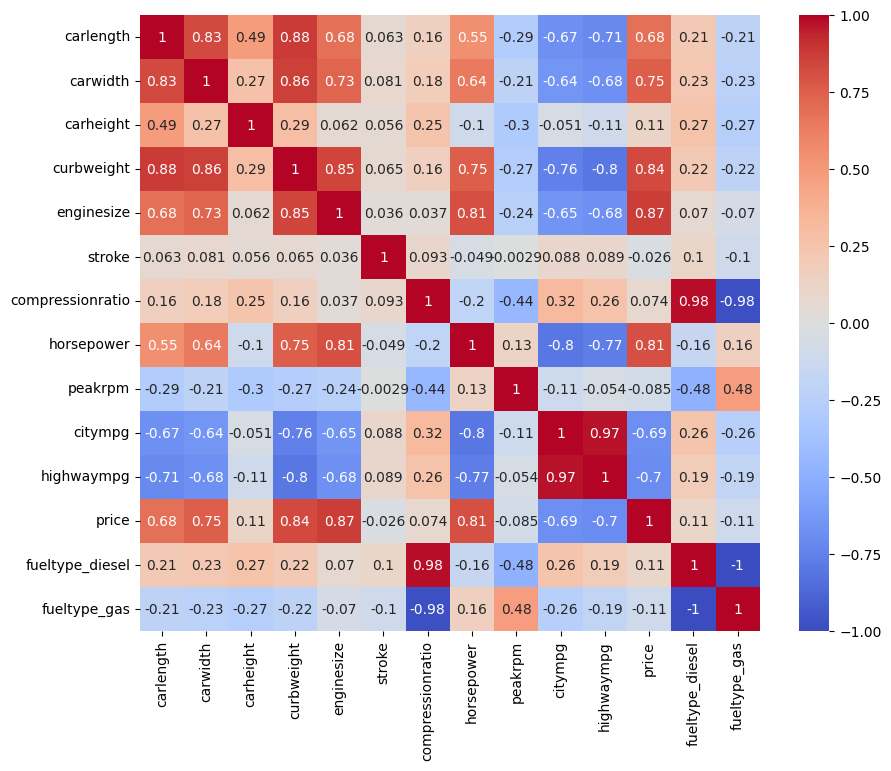

In [10]:
Correlaton(new_df)

Price has a good correlation with engine size, curb weight, horsepower and car width

In [11]:
X = new_df[['fueltype_diesel','carwidth', 'carheight', 'curbweight','enginesize','horsepower']]
y = new_df['price']

x_train, x_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.2, random_state=99)


scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

# Models

In [24]:
models = {
    "Linear Regression": LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,
                                           min_samples_leaf=1, random_state=42, n_jobs=-1),
    "Support Vector Regressor": SVR(kernel='rbf', degree=3, C=1.0, epsilon=0.1, gamma='scale'),
    "AdaBoost Regressor": AdaBoostRegressor( n_estimators=50, learning_rate=1.0, loss='linear', random_state=42)
}



for model_name, model in models.items():
    print(f"\n--- Evaluating {model_name} ---")
    mod(model, x_train_std, x_test_std, y_train, y_test)



--- Evaluating Linear Regression ---
Model: LinearRegression(n_jobs=-1)
Mean Squared Error (MSE): 10553207.18
Root Mean Squared Error (RMSE): 3248.57
Mean Absolute Error (MAE): 2364.70
R-squared (R²): 0.78

--- Evaluating Random Forest ---
Model: RandomForestRegressor(n_jobs=-1, random_state=42)
Mean Squared Error (MSE): 4855571.07
Root Mean Squared Error (RMSE): 2203.54
Mean Absolute Error (MAE): 1550.13
R-squared (R²): 0.90

--- Evaluating Support Vector Regressor ---
Model: SVR()
Mean Squared Error (MSE): 49134825.86
Root Mean Squared Error (RMSE): 7009.62
Mean Absolute Error (MAE): 4724.98
R-squared (R²): -0.03

--- Evaluating AdaBoost Regressor ---
Model: AdaBoostRegressor(random_state=42)
Mean Squared Error (MSE): 5888410.40
Root Mean Squared Error (RMSE): 2426.60
Mean Absolute Error (MAE): 1868.56
R-squared (R²): 0.88
